In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
mnist_train = datasets.MNIST(root = "./dataset", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root = "./dataset", train=False, transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle = False)

In [3]:
input_size = 784
hidden_size = [128,64]
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, hidden_size[0]),
    nn.ReLU(),
    nn.Linear(hidden_size[0], hidden_size[1]),
    nn.ReLU(),
    nn.Linear(hidden_size[1], output_size),
    nn.ReLU(),
    nn.LogSoftmax(dim=1)
)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.09)

epoch = 15
for e in range(epoch) :
    running_loss = 0;
    for images, labels in train_loader :
        images = images.view(images.shape[0], 784)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print("Epoch %f : Training loss %f" %(e, running_loss/len(train_loader)))



Epoch 0.000000 : Training loss 0.727393
Epoch 1.000000 : Training loss 0.263836
Epoch 2.000000 : Training loss 0.195466
Epoch 3.000000 : Training loss 0.154863
Epoch 4.000000 : Training loss 0.126777
Epoch 5.000000 : Training loss 0.106499
Epoch 6.000000 : Training loss 0.090969
Epoch 7.000000 : Training loss 0.078752
Epoch 8.000000 : Training loss 0.068972
Epoch 9.000000 : Training loss 0.061293
Epoch 10.000000 : Training loss 0.053998
Epoch 11.000000 : Training loss 0.048425
Epoch 12.000000 : Training loss 0.043207
Epoch 13.000000 : Training loss 0.037896
Epoch 14.000000 : Training loss 0.034407


In [4]:
torch.save(model,"MNIST.pt")

tensor(7)


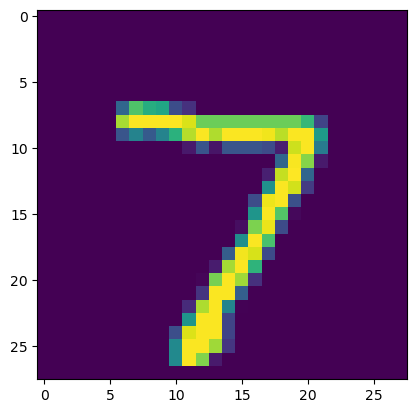

In [5]:
F = torch.load("MNIST.pt", weights_only = False)

img = mnist_test[0][0].reshape(28,28)
plt.imshow(img)

y_array = F(img.reshape(1,28*28))
print(torch.argmax( y_array))


In [6]:
cnt = 0;
for i in range(len(mnist_test)) :
    x = mnist_test[i][0].reshape(1,28*28)
    t = mnist_test[i][1]
    y = F(x)
    if torch.argmax(y) == t :
        cnt = cnt + 1

print("correct_posibility : %f" %(cnt / len(mnist_test)))
        

correct_posibility : 0.977000
